In [8]:
from analysis import get_track_durations_stdev_distribution
from analysis import get_artist_diversity_distribution
from pre_processing import read_pre_processed_data
import utils
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import ast

In [25]:
playlist_df, tracks_df, playlist_tracks_df = read_pre_processed_data('../data')

### Track Durations Standard Deviation Distribution

In [3]:
duration_s_stdevs = get_track_durations_stdev_distribution(tracks_df, playlist_tracks_df)

100%|██████████| 1000000/1000000 [02:07<00:00, 7853.22it/s]


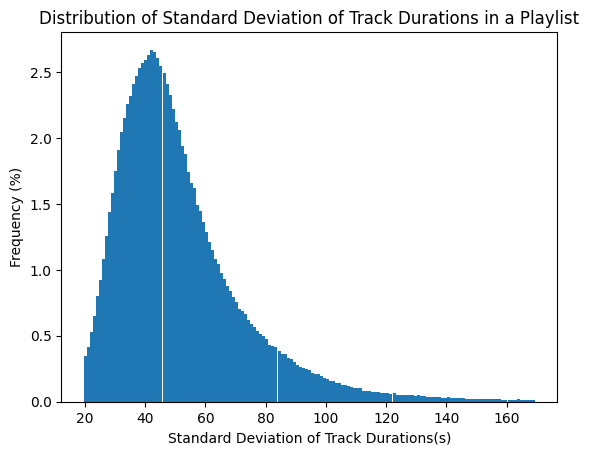

In [4]:
bins = np.linspace(np.percentile(duration_s_stdevs, 1), np.percentile(duration_s_stdevs, 99),
                   int(np.percentile(duration_s_stdevs, 99) - np.percentile(duration_s_stdevs, 1))+1)

# Count the number of elements in each bin
counts, _ = np.histogram(duration_s_stdevs, bins=bins)
counts = counts / np.sum(counts) * 100

# Plot the bar graph
plt.bar(bins[:-1], counts, width=1)  # Adjust width as needed
plt.xlabel("Standard Deviation of Track Durations(s)")
plt.ylabel("Frequency (%)")
plt.title("Distribution of Standard Deviation of Track Durations in a Playlist")
plt.show()

#### Playlist with the greatest track durations standard deviation

In [37]:
max_stdev_pid, max_stdev = np.argmax(duration_s_stdevs), np.max(duration_s_stdevs)
max_stdev_playlist = playlist_df[playlist_df['pid'] == max_stdev_pid].iloc[0]

# print the basic info about this playlist
print(max_stdev_playlist[['name', 'collaborative', 'num_tracks', 'num_albums', 'num_followers']])

# convert track id to track name and artist name
track_ids = ast.literal_eval(max_stdev_playlist['tracks'])
tracks_df[tracks_df['track_id'].isin(track_ids)][['artist_name', 'track_name', 'duration_s']]

name             Audiobooks
collaborative         False
num_tracks               18
num_albums               11
num_followers             2
Name: 278308, dtype: object


,artist_name,track_name,duration_s
905383,Basil Rathbone,The Raven,501
1072236,Inner Sanctum Mystery,The Tell-Tale Heart (1941) [feat. Boris Karloff],1602
1187965,David Moore,The Yellow Wallpaper,2190
1187966,Edgar Allan Poe,The Pit and the Pendulum (1957),1499
1187967,Richard Mitchley,The Outsider,1024
1187968,DBS Audiobooks,Pride and Prejudice - Jane Austen Part 1 of 2,19672
1187969,DBS Audiobooks,Northanger Abbey - Jane Austen Part 1 of 2,13049
1187970,DBS Audiobooks,Northanger Abbey - Jane Austen Part 2 of 2,11904
1187971,DBS Audiobooks,Persuasion - Jane Austen Part 1 of 2,14557
1187972,DBS Audiobooks,Persuasion - Jane Austen Part 2 of 2,13166


### Artist diversity distribution

In [38]:
artist_diversity = get_artist_diversity_distribution(tracks_df, playlist_tracks_df)

100%|██████████| 1000000/1000000 [02:50<00:00, 5853.09it/s]


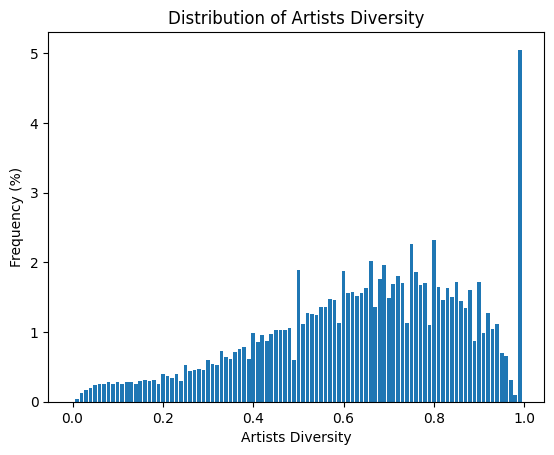

In [39]:
bins = np.linspace(0.0, 1.0, 101)

# Count the number of elements in each bin
counts, _ = np.histogram(artist_diversity, bins=bins)
counts = counts / np.sum(counts) * 100

# Plot the bar graph
plt.bar(bins[:-1], counts, width=0.008)  # Adjust width as needed
plt.xlabel("Artists Diversity")
plt.ylabel("Frequency (%)")
plt.title("Distribution of Artists Diversity")
plt.show()

#### Playlist with the lowest artists diversity

In [41]:
min_diversity_pid, min_diversity = np.argmin(artist_diversity), np.max(artist_diversity)
min_diversity_playlist = playlist_df[playlist_df['pid'] == min_diversity_pid].iloc[0]

# print the basic info about this playlist
print(min_diversity_playlist[['name', 'collaborative', 'num_tracks', 'num_albums', 'num_followers', 'num_artists']])

# convert track id to track name and artist name
track_ids = ast.literal_eval(min_diversity_playlist['tracks'])
tracks_df[tracks_df['track_id'].isin(track_ids)][['artist_name', 'track_name', 'duration_s']]

name             Future
collaborative     False
num_tracks          127
num_albums           10
num_followers         1
num_artists           4
Name: 491207, dtype: object


,artist_name,track_name,duration_s
1913,Future,Turn On The Lights,249
18505,Future,Neva End,262
22601,Future,Tony Montana,248
22604,Future,Straight Up,177
34099,Future,Same Damn Time (Remix),273
...,...,...,...
489006,Future,Praise Him (Gospel),261
489007,Future,Moving On,362
489008,Future,Away (Remix),230
619436,Future,Never Seen Those Skit,25
